In [1]:
import os
os.chdir("/home/piai/바탕화면/A3_유아용품")

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [48]:
df_raw = pd.read_csv('Member_data.csv',encoding='euc-kr')
df_raw

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81355,20200724113017300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81356,20200729134409100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81357,20200803075905700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81358,20200805170229100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_raw.isnull().sum()

고객번호        0
성별        266
결혼유무      266
거주지역      266
연령        266
결제등록카드    266
유입경로      266
자녀여부      266
dtype: int64

In [50]:
df_raw.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부'], dtype='object')

In [51]:
df_raw.drop('고객번호', axis=1, inplace=True)

In [52]:
df_null_rows = df_raw[df_raw.isnull().any(axis=1)]
print(df_null_rows)

        성별 결혼유무 거주지역  연령 결제등록카드 유입경로 자녀여부
81094  NaN  NaN  NaN NaN    NaN  NaN  NaN
81095  NaN  NaN  NaN NaN    NaN  NaN  NaN
81096  NaN  NaN  NaN NaN    NaN  NaN  NaN
81097  NaN  NaN  NaN NaN    NaN  NaN  NaN
81098  NaN  NaN  NaN NaN    NaN  NaN  NaN
...    ...  ...  ...  ..    ...  ...  ...
81355  NaN  NaN  NaN NaN    NaN  NaN  NaN
81356  NaN  NaN  NaN NaN    NaN  NaN  NaN
81357  NaN  NaN  NaN NaN    NaN  NaN  NaN
81358  NaN  NaN  NaN NaN    NaN  NaN  NaN
81359  NaN  NaN  NaN NaN    NaN  NaN  NaN

[266 rows x 7 columns]


In [53]:
df_raw = df_raw.dropna()

In [54]:
df_raw.isnull().sum()

성별        0
결혼유무      0
거주지역      0
연령        0
결제등록카드    0
유입경로      0
자녀여부      0
dtype: int64

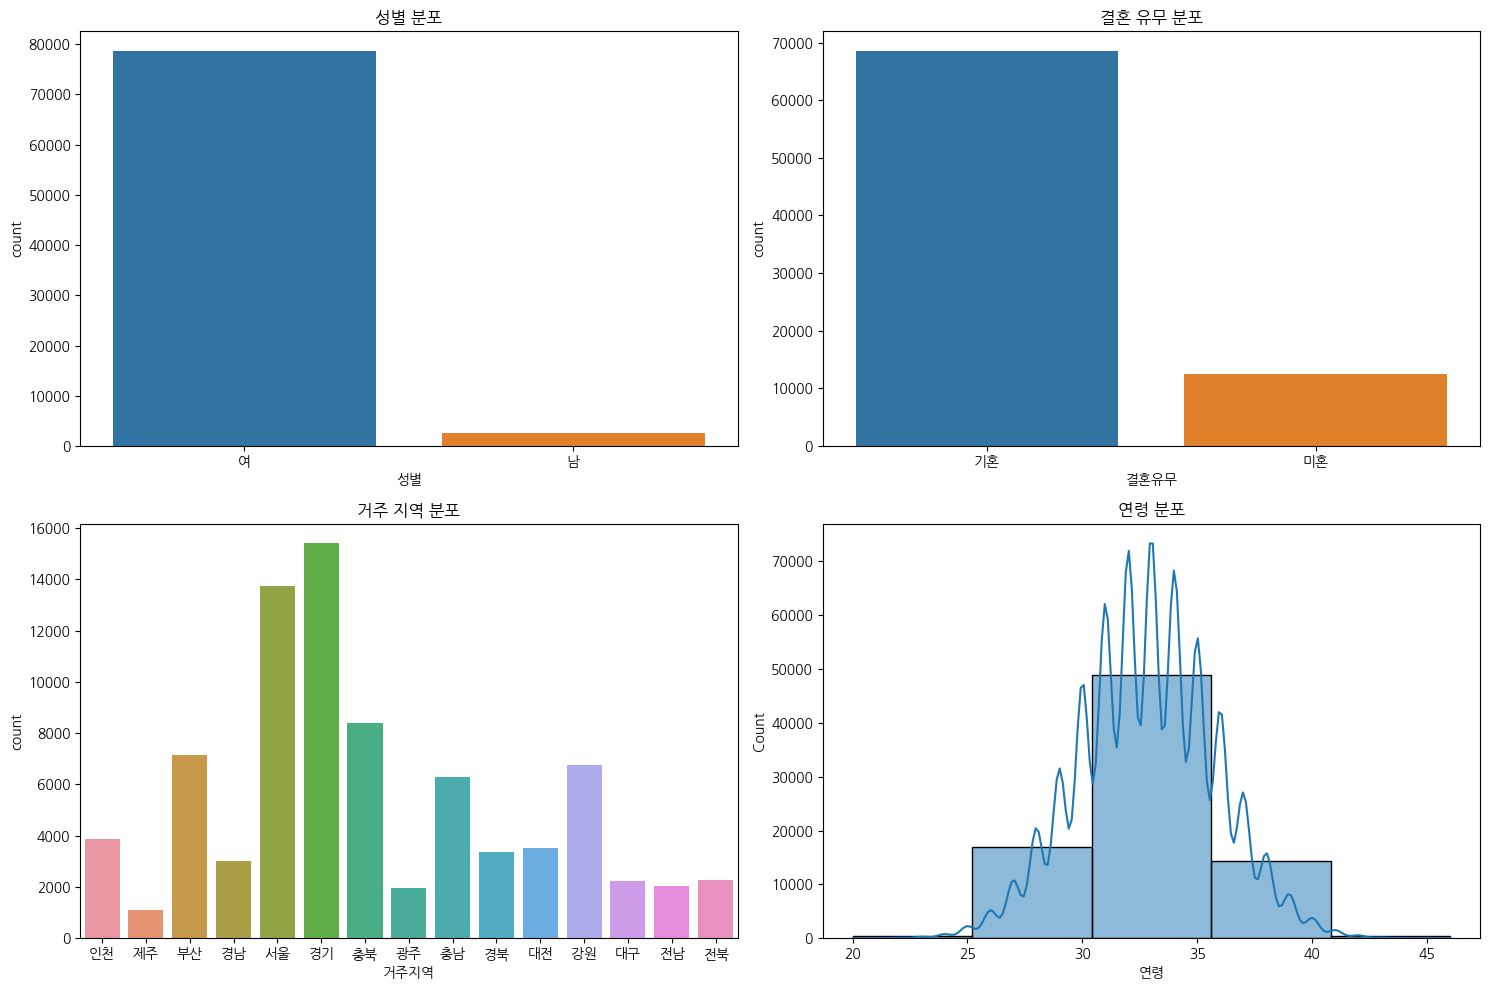

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  

# 성별 분포
sns.countplot(x="성별", data=df_raw, ax=axes[0, 0])
axes[0, 0].set_title("성별 분포")

# 결혼 유무 분포
sns.countplot(x="결혼유무", data=df_raw, ax=axes[0, 1])
axes[0, 1].set_title("결혼 유무 분포")

# 거주 지역 분포
sns.countplot(x="거주지역", data=df_raw, ax=axes[1, 0])
axes[1, 0].set_title("거주 지역 분포")

# 연령 히스토그램
sns.histplot(df_raw["연령"], bins=5, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("연령 분포")

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [56]:
import pandas as pd

# 범주형 변수들만 선택
categorical_columns = df_raw.select_dtypes(include=['object']).columns

# 범주형 변수들에 대해 원-핫 인코딩 수행
df_encoded = pd.get_dummies(df_raw, columns=categorical_columns, drop_first=True)

# 결과 확인
df_encoded.head()

,연령,성별_여,결혼유무_미혼,거주지역_경기,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,...,유입경로_네이버블로그,유입경로_네이버카페,유입경로_매장쿠폰,유입경로_오픈마켓,유입경로_이마트,유입경로_인스타그램,유입경로_지인추천,유입경로_직접검색,유입경로_페이스북,자녀여부_Yes
0,37.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,32.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,34.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,32.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


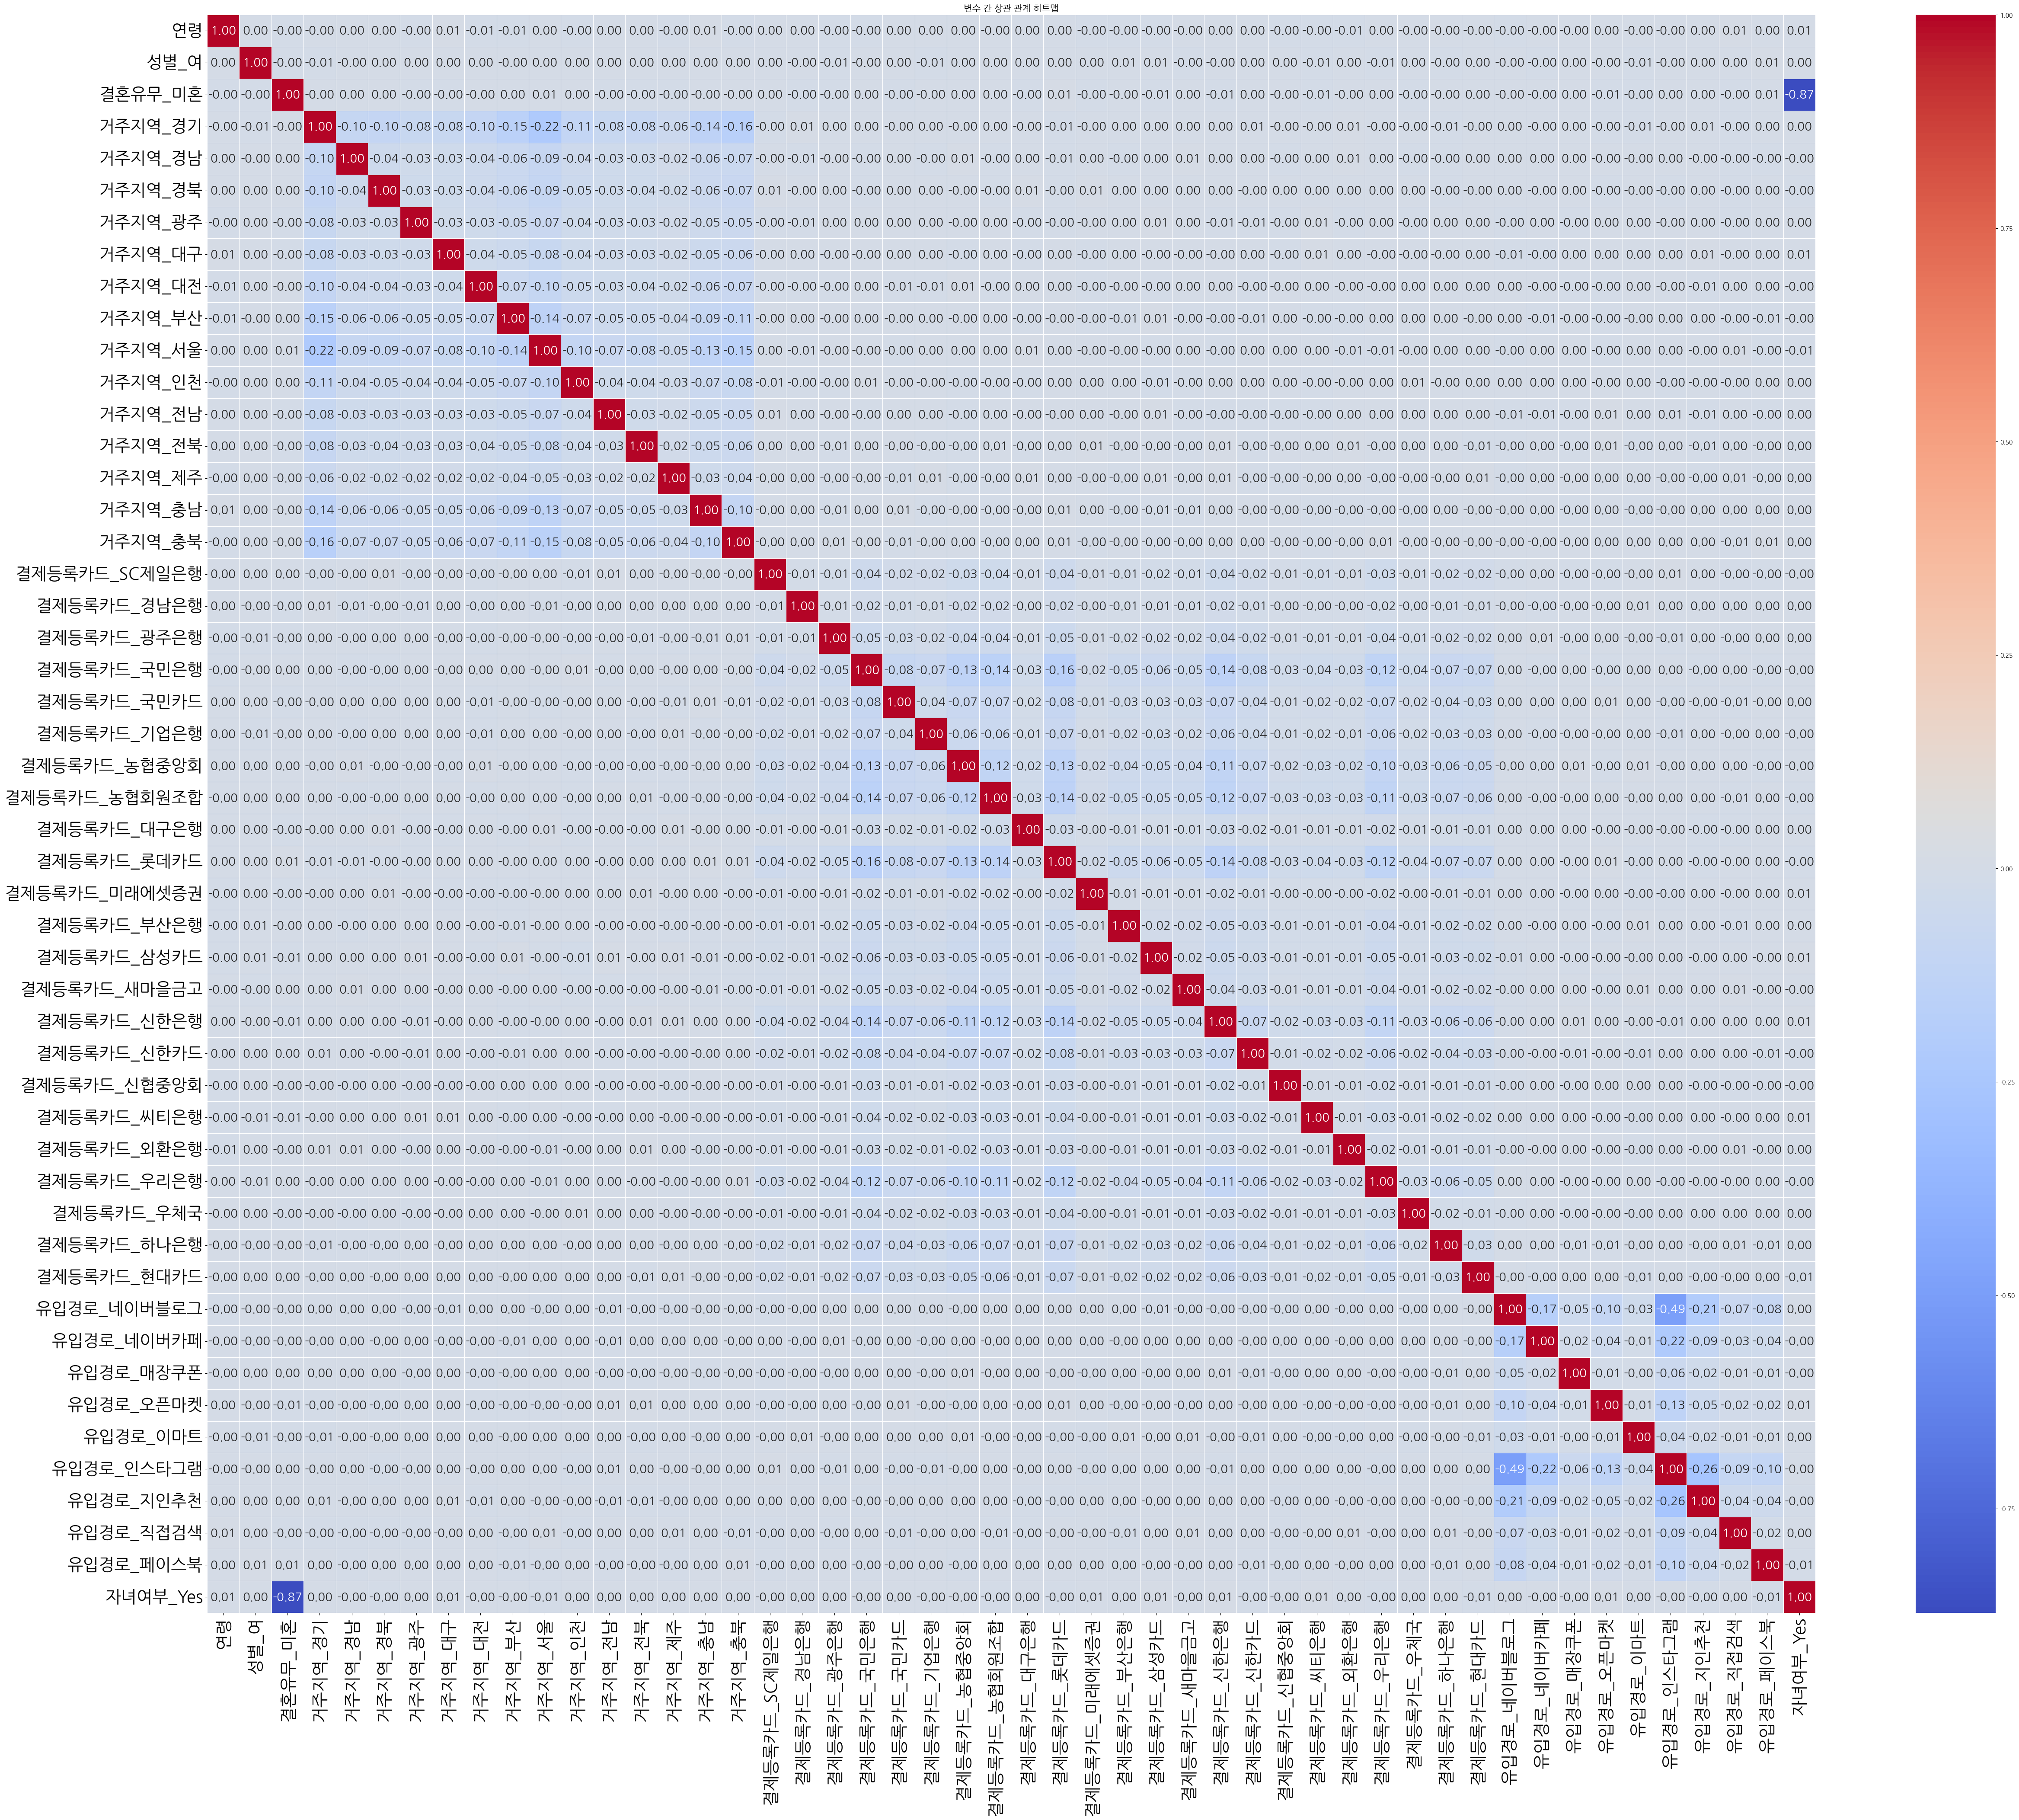

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 원-핫 인코딩 수행
categorical_columns = df_raw.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_raw, columns=categorical_columns, drop_first=True)

# 상관 행렬 계산
corr_matrix = df_encoded.corr()

# 히트맵 그리기
plt.figure(figsize=(60, 48))  # 그래프 크기 키우기
sns.heatmap(
    corr_matrix, 
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, 
    annot_kws={"size": 20}  # 글씨 크기 조정
)

plt.title("변수 간 상관 관계 히트맵", fontsize=15)  # 제목 크기 키우기
plt.xticks(fontsize=28)  # X축 글씨 크기
plt.yticks(fontsize=28)  # Y축 글씨 크기
plt.show()


In [69]:
df_raw2 = pd.read_csv('Product_data.csv',encoding='euc-kr')
df_raw2

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994


In [70]:
df_raw2.isnull().sum()

물품대분류    0
상품명      0
물품판매량    0
제품단가     0
dtype: int64

In [71]:
df_raw2.columns

Index(['물품대분류', '상품명', '물품판매량', '제품단가'], dtype='object')

In [72]:
# 각 컬럼에서 unique 값들 추출
unique_values = {col: df_raw2[col].unique() for col in df_raw2.columns}
unique_values

{'물품대분류': array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
       dtype=object),
 '상품명': array(['(1+1) 좋은느낌 입는 오버나이트 대형 8개입', '(1+1) 좋은느낌 입는 오버나이트 중형 8개입',
        '(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA)', ...,
        '하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형)', '하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)',
        '하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)'], dtype=object),
 '물품판매량': array([   15,    10,    27,    12,     4,     5,    24,    97,     1,
           26,     6,     3,    23,     7,    18,    14,    16,     2,
           13,    34,    25,    19,    39,    33,    62,    28,    98,
            9,    55,    22,    11,     8,    78,    75,   107,    29,
          100,    38,   104,    53,    57,    91,    42,    81,   313,
          336,   353,    47,    37,   246,   390,   571,   127,    58,
          279,    32,   426,   219,   269,   329,    31,   305,   407,
           92,   112,    77,   110,    17,   149,   444,   206,    95,
          121,   479,   609,    44,    30,    20,    88,   137,

In [77]:
df_raw2 = pd.read_csv('기타_상품카테고리_유아용품.csv',encoding='utf-8')
df_raw2

,물품대분류,상품명,물품판매량,제품단가,상품카테고리
0,기타,(1번세트/증정) 더블하트 레스랩 유아용 섬유세제 50ml (EA),1,0,세트
1,기타,(증정) 그린핑거 손소독 물티슈 캡형 30매 X 10개입,28,0,프로모션
2,기타,(증정) 레드투래드 안티더스트 클렌징 폼 20ml (EA),6,0,프로모션
3,기타,(증정) 레드투래드 클렌징 브러쉬 (EA),4,0,프로모션
4,기타,(증정) 쥬트 린넨 쇼퍼백,13,0,프로모션
...,...,...,...,...,...
1240,기타,티엔 촉촉 클렌징 티슈 (30매),30,7000,화장품/스킨케어
1241,기타,티엔 촉촉 클렌징 폼 100ml,14,12750,화장품/스킨케어
1242,기타,티엔 촉촉 토너 230ml,11,21864,화장품/스킨케어
1243,기타,티엔 클렌징 워터 270ml,2,30750,화장품/스킨케어


### 15개 카테고리로 분류

In [78]:
df_raw2['상품카테고리'].unique()

array(['세트', '프로모션', '욕실용품', '화장품/스킨케어', '유아용품', '장난감/완구', '식품', '잡화',
       '영양제', '식기', '주방용품', '이유식', '의류', '유모차', '차량용품'], dtype=object)

### 상품수: 1위 장난감/완구, 2위 욕실용품, 3위 프로모션

In [83]:
category_counts = df_raw2['상품카테고리'].value_counts().reset_index()
category_counts.columns = ['상품카테고리', '상품 수']
print(category_counts)

      상품카테고리  상품 수
0     장난감/완구   241
1       욕실용품   146
2       프로모션   141
3         세트   124
4       주방용품   111
5         식기    95
6       유아용품    92
7         식품    79
8         잡화    79
9   화장품/스킨케어    50
10       영양제    38
11        의류    29
12      차량용품     9
13       이유식     8
14       유모차     3


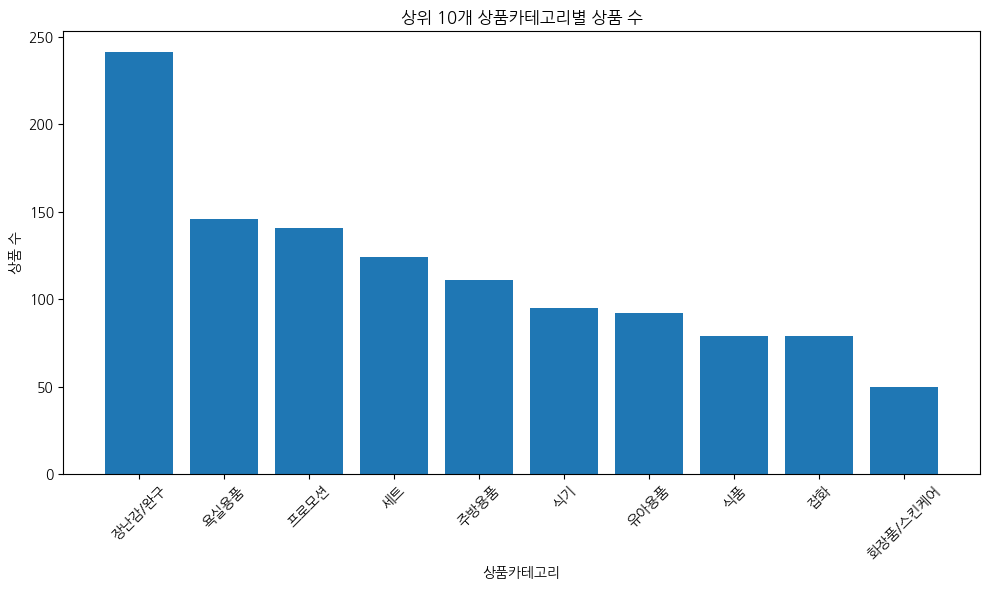

In [87]:
top10 = category_counts.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10['상품카테고리'], top10['상품 수'])
plt.xticks(rotation=45)
plt.title('상위 10개 상품카테고리별 상품 수')
plt.xlabel('상품카테고리')
plt.ylabel('상품 수')
plt.tight_layout()
plt.show()

### 평균제품단가: 1위 유모차, 2위 영양제, 3위 프로모션

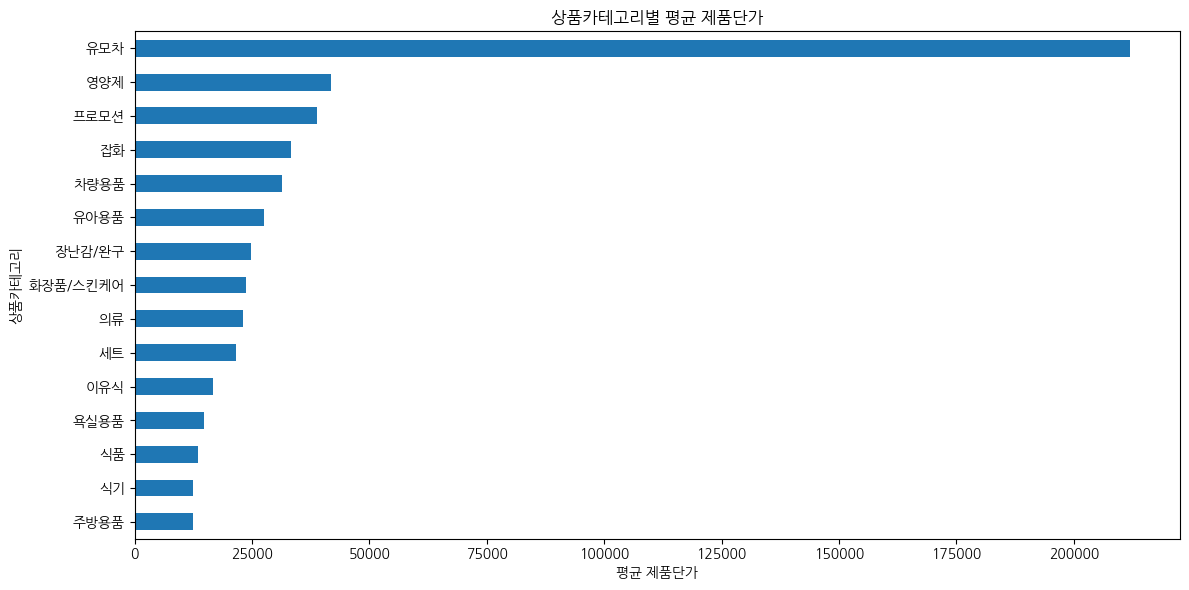

In [79]:
import matplotlib.pyplot as plt

avg_price_by_category = df_raw2.groupby('상품카테고리')['제품단가'].mean().sort_values()

plt.figure(figsize=(12,6))
avg_price_by_category.plot(kind='barh')
plt.title('상품카테고리별 평균 제품단가')
plt.xlabel('평균 제품단가')
plt.ylabel('상품카테고리')
plt.tight_layout()
plt.show()

### 총판매량: 1위 욕실용품, 2위 프로모션, 3위 장난감/완구

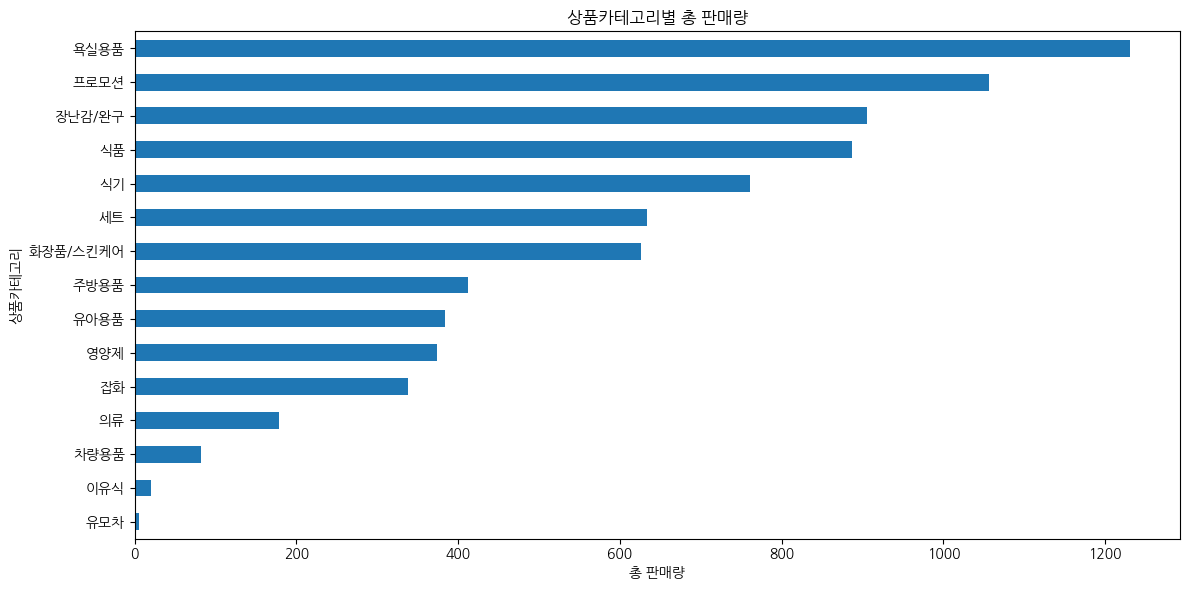

In [93]:
total_sales_by_category = df_raw2.groupby('상품카테고리')['물품판매량'].sum().sort_values()

plt.figure(figsize=(12,6))
total_sales_by_category.plot(kind='barh')
plt.title('상품카테고리별 총 판매량')
plt.xlabel('총 판매량')
plt.ylabel('상품카테고리')
plt.tight_layout()
plt.show()

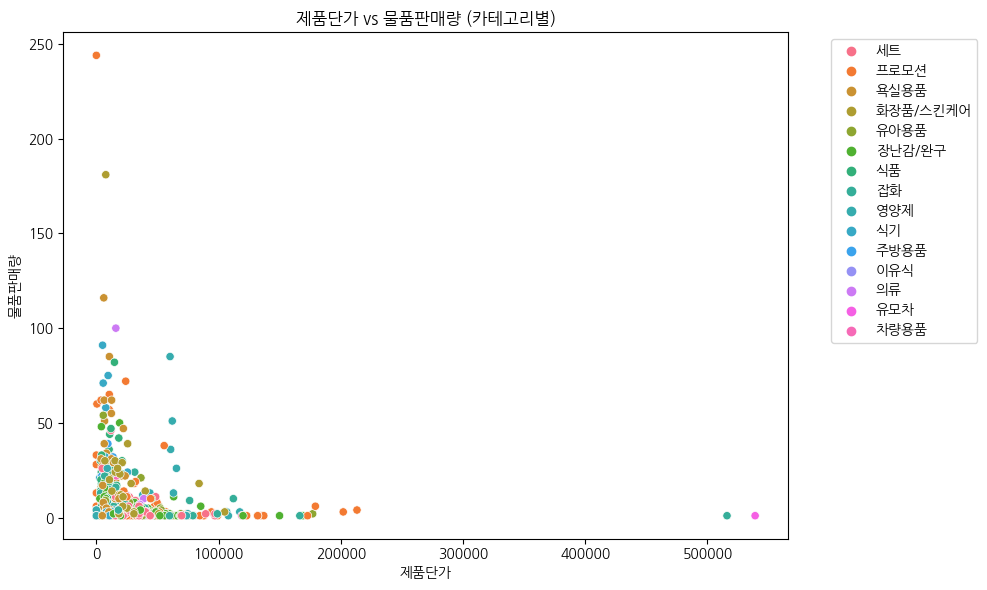

In [82]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_raw2, x='제품단가', y='물품판매량', hue='상품카테고리')
plt.title('제품단가 vs 물품판매량 (카테고리별)')
plt.xlabel('제품단가')
plt.ylabel('물품판매량')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 1. 카테고리별 매출 분석 (판매량 × 단가)

In [89]:
df_raw2['매출'] = df_raw2['물품판매량'] * df_raw2['제품단가']
sales_by_category = df_raw2.groupby('상품카테고리')['매출'].sum().sort_values(ascending=False)
sales_by_category

상품카테고리
프로모션        18142674
영양제         17308261
장난감/완구      16497922
욕실용품        13992721
화장품/스킨케어    11188338
식품          10461538
세트           9881438
잡화           8676593
유아용품         7845817
식기           7487460
주방용품         4667492
의류           3623098
차량용품         1397380
유모차           692000
이유식           335790
Name: 매출, dtype: int64

###  2. 고가 vs 저가 제품 분포

In [90]:
price_dist = df_raw2.groupby('상품카테고리')['제품단가'].describe()
price_dist

,count,mean,std,min,25%,50%,75%,max
상품카테고리,,,,,,,,
세트,124.0,21548.233871,17638.472281,0.0,10199.50,15900.0,26179.25,97000.0
식기,95.0,12437.705263,5631.565409,2800.0,8330.00,10950.0,16190.00,26900.0
식품,79.0,13536.227848,6525.478684,3214.0,9377.00,13900.0,17651.50,39750.0
영양제,38.0,41730.763158,33174.319054,0.0,15065.50,36950.0,63587.50,117333.0
욕실용품,146.0,14801.082192,9344.985735,0.0,8900.00,12449.0,18500.00,58000.0
유모차,3.0,212000.000000,283931.329726,28000.0,48500.00,69000.0,304000.00,539000.0
유아용품,92.0,27570.489130,23698.832427,4900.0,12125.25,22500.0,33839.25,177000.0
의류,29.0,23059.724138,9562.814573,8900.0,13500.00,24900.0,29250.00,44500.0
이유식,8.0,16659.875000,1427.789444,15210.0,15210.00,16589.5,17561.00,18900.0


### 3. 상관관계 분석

In [92]:
df_raw2[['제품단가', '물품판매량', '매출']].corr()

,제품단가,물품판매량,매출
제품단가,1.000000,-0.103406,0.217908
물품판매량,-0.103406,1.000000,0.548717
매출,0.217908,0.548717,1.000000
